# Polynomial Regression

# importing the libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


# making the dataset

In [28]:
X=6*np.random.rand(200,1)-3
y=0.8*X**2+0.9*X+2+np.random.randn(200,1)
#x,y
#y=0.8*X**2+0.9*X+2

# plotting 

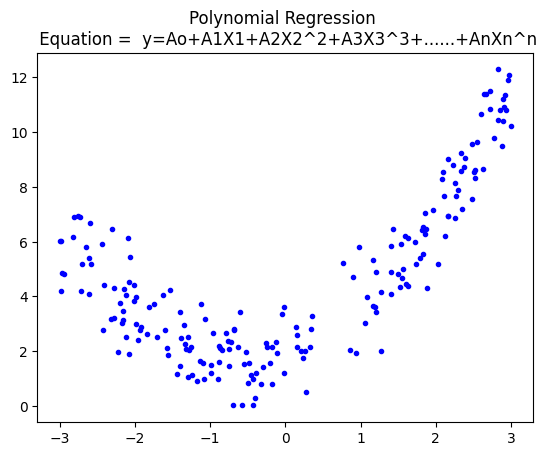

In [80]:
plt.plot(X,y,'b.')
plt.title("Polynomial Regression \n Equation =  y=Ao+A1X1+A2X2^2+A3X3^3+......+AnXn^n")
plt.show()

# splitting the datas

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Linear regression

In [82]:
lr = LinearRegression()

# fitting into linear regression

In [83]:
lr.fit(X_train,y_train)

LinearRegression()

# predicting

In [84]:
y_pred = lr.predict(X_test)
print("The R^2 is : ",r2_score(y_test,y_pred))

The R^2 is :  0.5070318743198813


# plotting

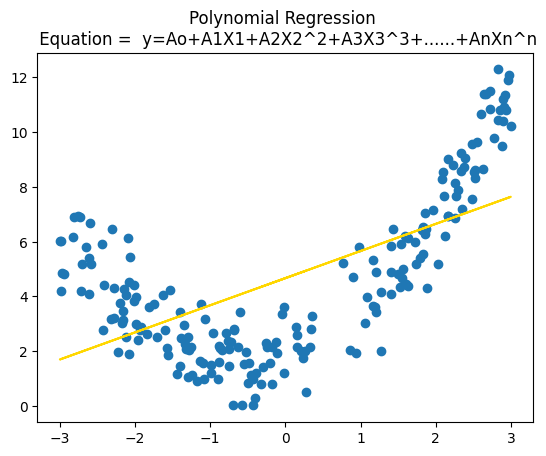

In [85]:
plt.plot(X_train,lr.predict(X_train),'gold')
plt.title("Polynomial Regression \n Equation =  y=Ao+A1X1+A2X2^2+A3X3^3+......+AnXn^n")
plt.scatter(X,y)
plt.show()

# applying polynomial

In [86]:
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_trans=poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

print(X_train[0])
print(X_train_trans[0])

[0.26338438]
[1.         0.26338438 0.06937133]


In [87]:
lr =  LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [88]:
y_pred = lr.predict(X_test_trans)

r2_score(y_test,y_pred)

0.874056577325801

In [89]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.87479274 0.78524018]]
[1.96616487]


In [90]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
y_new = lr.predict(X_new_poly)

# plotting

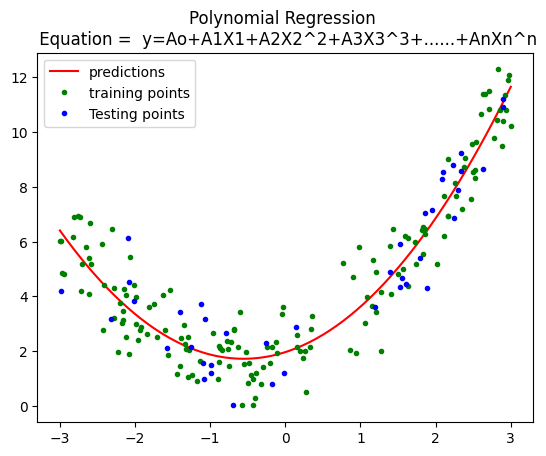

In [91]:
plt.plot(X_new,y_new,"r-",label="predictions")
plt.title("Polynomial Regression \n Equation =  y=Ao+A1X1+A2X2^2+A3X3^3+......+AnXn^n")
plt.plot(X_train,y_train,"g.",label="training points")
plt.plot(X_test,y_test,"b.",label="Testing points")
plt.legend()
plt.show()

# for other degress too

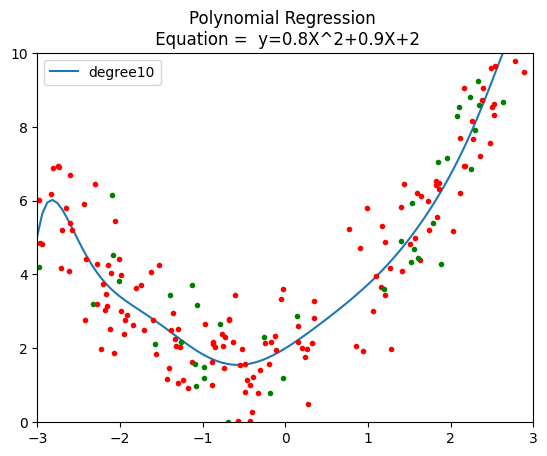

In [92]:
def polynomial_regr(degree):
    X_new = np.linspace(-3,3,100).reshape(100,1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scalar = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regr = Pipeline([
        ("poly-features",polybig_features),
        ("std-scalar",std_scalar),
        ("lin-reg",lin_reg)
    ])
    polynomial_regr.fit(X,y)
    y_newbig = polynomial_regr.predict(X_new)
    plt.plot(X_new,y_newbig,label="degree"+str(degree))

    plt.plot(X_train,y_train,"r.")
    plt.title("Polynomial Regression \n Equation =  y=0.8X^2+0.9X+2")
    plt.plot(X_test,y_test,"g.")
    plt.legend(loc='upper left')
    plt.axis([-3,3,0,10])
    plt.show()

deg = int(input('Enter the degree : '))
polynomial_regr(deg)